# Image Enhancement
In this notebook, image enhancement techniques will be covered with the help of the OpenCv library.
### Content:
- Negative Image
- Thresholding
- Logarithmiz Transformations
- Gamma Correction
- Gray Level Slicing
- Bit Plane Slicing
- Histogram Equalization
- Histogram Matching


## Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Get the data

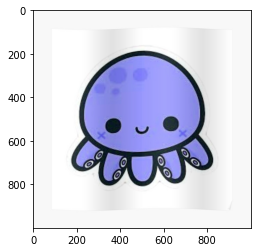

In [5]:
img = cv2.imread("drive/MyDrive/cute_octopus.jpg")

# plots image as BGR
plt.imshow(img);

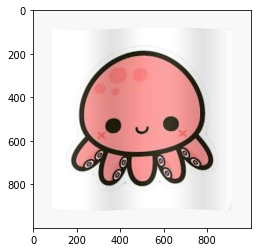

In [8]:
# convert image from BGR to RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB);

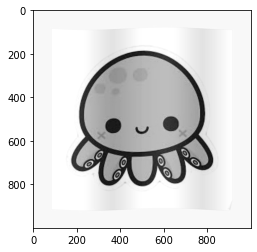

In [13]:
# convert image from BGR to grayscale
img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grayscaled, cmap="gray");

## Negative of The Image

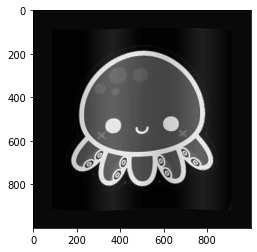

In [15]:
# taking negative of the image 
negative_image = 1 - img_grayscaled
plt.imshow(negative_image, cmap="gray");

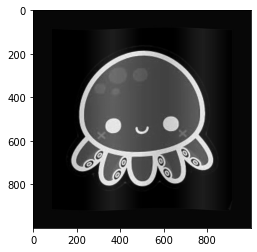

In [17]:
# is this the same thing with below:
negative = abs(255-img_grayscaled)
plt.imshow(negative, cmap="gray");

## Thresholding

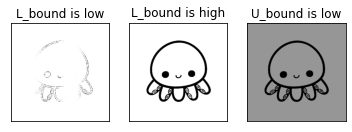

In [32]:
# i will try thresholding with different values to see the results
ret, threshold1 = cv2.threshold(img_grayscaled, 20, 255, cv2.THRESH_BINARY)
ret, threshold2 = cv2.threshold(img_grayscaled, 100, 255, cv2.THRESH_BINARY)
ret, threshold3 = cv2.threshold(img_grayscaled, 100, 150, cv2.THRESH_BINARY)

titles = ["L_bound is low", "L_bound is high", "U_bound is low"]
images = [threshold1, threshold2, threshold3]

for i in range(3):
  plt.subplot(1,3,i+1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()  

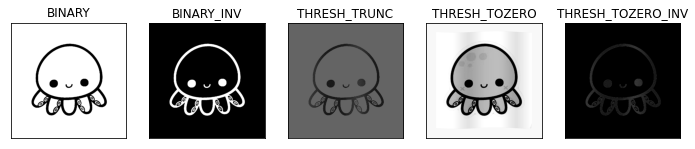

In [48]:
# i will try all of the thresholding methods that I saw in OpenCV documentation
ret, threshold4 = cv2.threshold(img_grayscaled, 100, 255, cv2.THRESH_BINARY)
ret, threshold5 = cv2.threshold(img_grayscaled, 100, 255, cv2.THRESH_BINARY_INV)
ret, threshold6 = cv2.threshold(img_grayscaled, 100, 255, cv2.THRESH_TRUNC)
ret, threshold7 = cv2.threshold(img_grayscaled, 100, 255, cv2.THRESH_TOZERO)
ret, threshold8 = cv2.threshold(img_grayscaled, 100, 255, cv2.THRESH_TOZERO_INV)

titles2 = ["BINARY", "BINARY_INV", "THRESH_TRUNC", "THRESH_TOZERO", "THRESH_TOZERO_INV"]
images2 = [threshold4, threshold5, threshold6, threshold7, threshold8]

plt.figure(figsize=(12,12))

for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(images2[i], 'gray', vmin= 0, vmax=255)
  plt.title(titles2[i])
  
  plt.xticks([]), plt.yticks([])


plt.show();

## Log Transformation

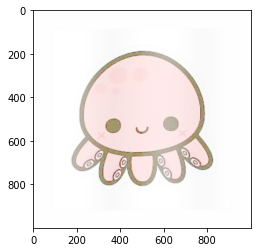

In [53]:
img_log = img_RGB.copy()
cv2.intensity_transform.logTransform(img_RGB,img_log)
plt.imshow(img_log);

## Gamma Correction


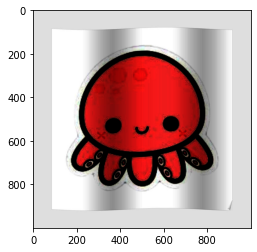

In [55]:
img_gamma = img_RGB.copy()
cv2.intensity_transform.gammaCorrection(img_RGB, img_gamma, 5)
plt.imshow(img_gamma);

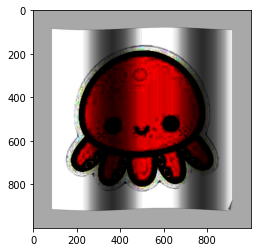

In [56]:
img_gamma2 = img_RGB.copy()
cv2.intensity_transform.gammaCorrection(img_RGB, img_gamma2, 15)
plt.imshow(img_gamma2);

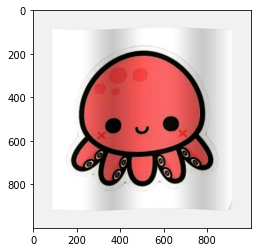

In [57]:
img_gamma3 = img_RGB.copy()
cv2.intensity_transform.gammaCorrection(img_RGB, img_gamma3, 2)
plt.imshow(img_gamma3);

## Gray Level Slicing

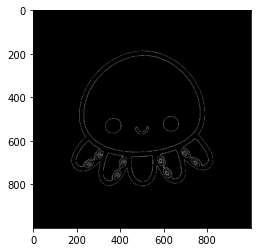

In [60]:
x, y = img_grayscaled.shape
img_gray_level_sliced = np.zeros((x, y), dtype= 'uint8')
min = 70
max = 110
for i in range(x):
  for j in range(y):
    if img_grayscaled[i,j] > min and img_grayscaled[i, j] < max:
      img_gray_level_sliced[i,j] = 255
    else:
      img_gray_level_sliced[i,j] = 0

plt.imshow(img_gray_level_sliced, cmap='gray');

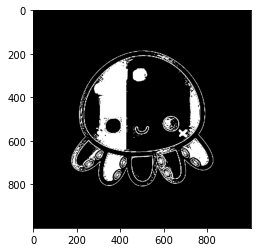

In [61]:
x, y = img_grayscaled.shape
img_gray_level_sliced2 = np.zeros((x, y), dtype= 'uint8')
min = 50
max = 170
for i in range(x):
  for j in range(y):
    if img_grayscaled[i,j] > min and img_grayscaled[i, j] < max:
      img_gray_level_sliced2[i,j] = 255
    else:
      img_gray_level_sliced2[i,j] = 0

plt.imshow(img_gray_level_sliced2, cmap='gray');

## Bit-plane Slicing

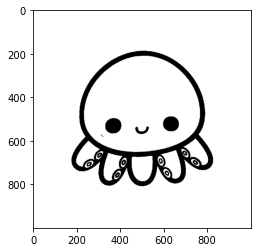

In [65]:
binary_list = []

# convert pixels to binary representations
for i in range(x):
  for j in range(y):
    binary_list.append(np.binary_repr(img_grayscaled[i,j], width=8))

img_eight_bit = (np.array([int(i[0]) for i in binary_list], dtype = np.uint8) * 128).reshape(x, y)

plt.imshow(img_eight_bit, cmap="gray");

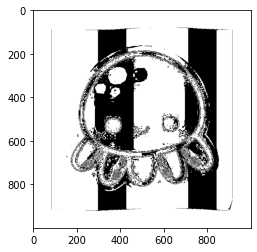

In [68]:
img_five_bit = (np.array([int(i[3]) for i in binary_list], dtype = np.uint8) * 16).reshape(x, y)
plt.imshow(img_five_bit, cmap="gray");

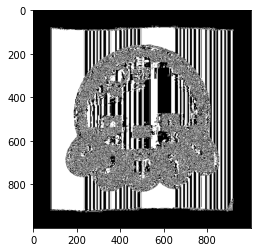

In [69]:
img_two_bit = (np.array([int(i[6]) for i in binary_list], dtype = np.uint8) * 2).reshape(x, y)
plt.imshow(img_two_bit, cmap="gray");

## Histogram Equalization

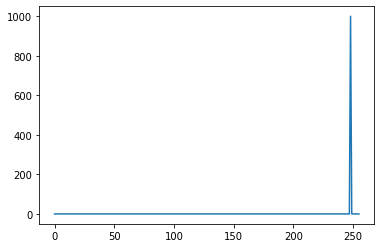

In [76]:
hist = cv2.calcHist(img[:,:,2],[0], None, [256], (0,256))
plt.plot(hist);

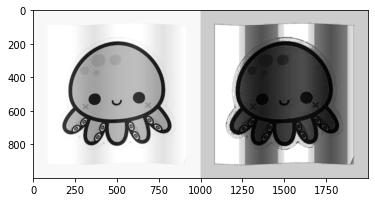

In [71]:
img_hist_equalized = cv2.equalizeHist(img_grayscaled)
# stacking images side by side to show differencies
result = np.hstack((img_grayscaled, img_hist_equalized))
plt.imshow(result, cmap="gray");

## Histogram Matching

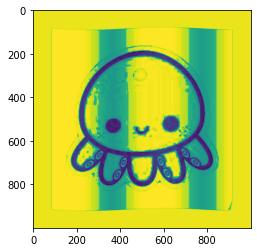

In [78]:
from skimage.exposure import histogram_matching as hm
source = img[:,:,2]
reference = img[:,:,1]
img_hist_matched = hm.match_histograms(source, reference)
plt.imshow(img_hist_matched);

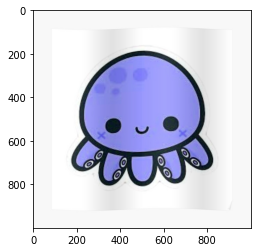

In [79]:
plt.imshow(img);